# Question 1

<function matplotlib.pyplot.show>

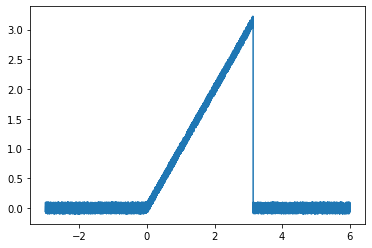

In [1]:
import numpy
import matplotlib.pyplot as plt
from scipy.fftpack import fft, ifft, fftfreq
import random

N_samples = 1000
t_low = -3
t_high = 6

t = numpy.arange(t_low,t_high,1/N_samples)
y = numpy.zeros(len(t))

for i in range(len(t)):
    if t[i] < 0.0:
        y[i] = 0.0 + 0.1*random.uniform(-1, 1)
    if t[i] >= 0.0 and t[i] < numpy.pi:
        y[i] = t[i] + 0.1*random.uniform(-1, 1)
    if t[i] >= numpy.pi:
        y[i] = 0.0 + 0.1*random.uniform(-1, 1)
    
plt.plot(t,y)
plt.show

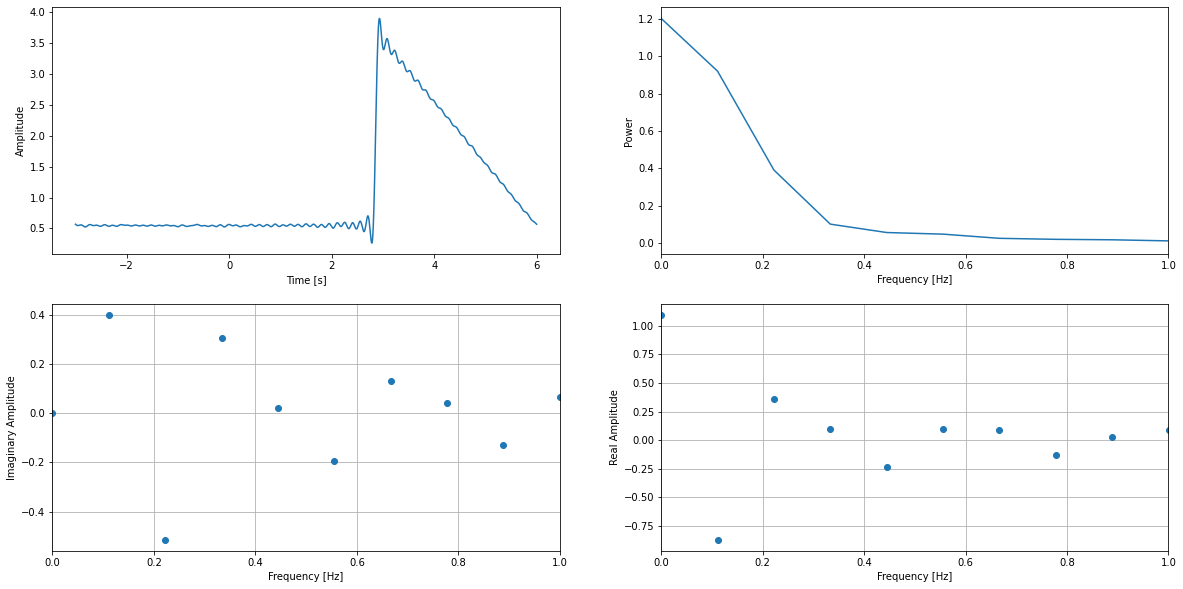

In [2]:
N_fft = len(y)

yfft = fft(y)

yfftReal = 2.0 / len(t) * yfft.real
yfftImag = 2.0 / len(t) * yfft.imag
powerfft = 4.0/ N_fft ** 2 * abs(yfft) ** 2

freq = N_samples / 2. * numpy.linspace(0, 1, int(len(t) / 2.))

y_approx = numpy.zeros(len(t))
for i in range(60):
    y_approx += yfftReal[i] * numpy.cos(2. * numpy.pi * freq[i] *  t) + yfftImag[i] * numpy.sin(2. * numpy.pi * freq[i] * t)


fig, axs = plt.subplots(2, 2, figsize=(20,10))
axs[0][0].plot(t, y_approx)
axs[0][0].set_xlabel('Time [s]')
axs[0][0].set_ylabel('Amplitude')

axs[0][1].plot(freq, powerfft[0:len(freq)])
axs[0][1].set_xlim(0,1)
axs[0][1].set_xlabel('Frequency [Hz]')
axs[0][1].set_ylabel('Power')

axs[1][0].plot(freq, yfftImag[0:len(freq)], 'o')
axs[1][0].set_xlim(0, 1)
axs[1][0].set_xlabel('Frequency [Hz]')
axs[1][0].set_ylabel('Imaginary Amplitude')
axs[1][0].grid()

axs[1][1].plot(freq, yfftReal[0:len(freq)], 'o')
axs[1][1].set_xlim(0, 1)
axs[1][1].set_xlabel('Frequency [Hz]')
axs[1][1].set_ylabel('Real Amplitude')
axs[1][1].grid()
plt.show()

Based on our choice of sampling frequency, the Nyquist Frequency is 500Hz. For some reason (that I cannot for the life of me figure out) my Fourier spectrum is time-shifted from the original and is also mirrored about the vertical line. To get the general form you only need 20 points. However, the form is much more refined by around 60 points.

# Question 2


In [1]:
import numpy
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

def linearfit(x,*paramlist):
    return paramlist[0]+paramlist[1]*x

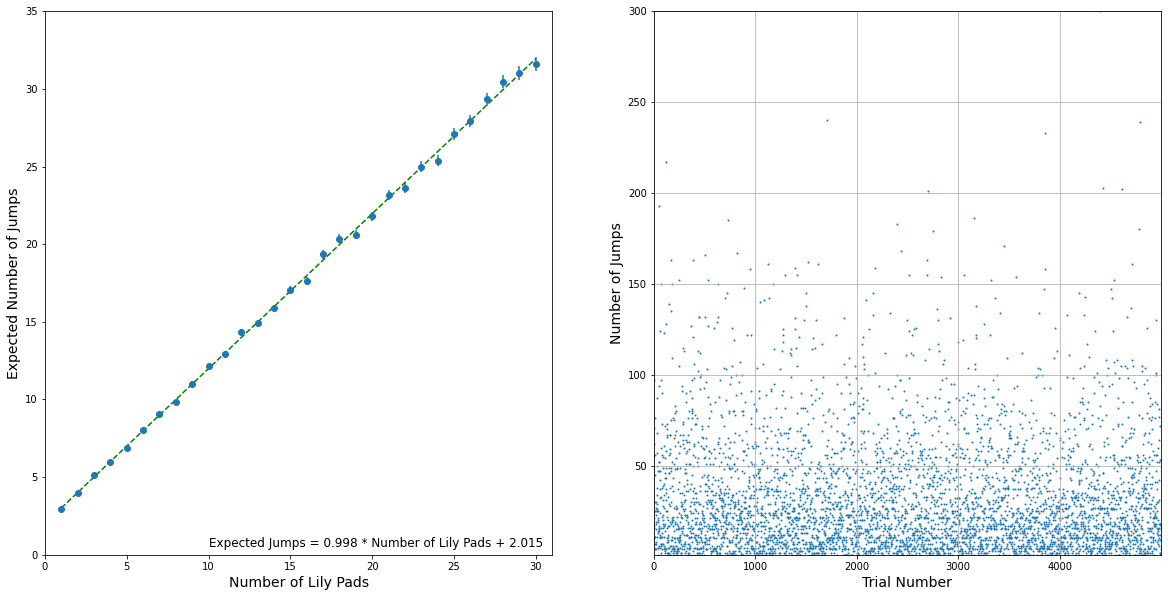

In [2]:
num_pads_max = 30
x = numpy.arange(1, num_pads_max+1,1)
y = []
sigma = []

for num_pads in range(1, num_pads_max + 1):
    # Include the start and end platforms as availiable positions.
    num_positions = num_pads + 2 
    
    # Initialize the array to hold each trials jump number.
    total_jumps = []

    # Do 10,000 trials for that number of pads.
    for trial in range(5000):
        cur_pos = 0
        num_jumps = 0

        while cur_pos + 1 != num_positions:
            # Pick the new position using a random uniform distribution.
            cur_pos = numpy.random.randint(0,num_positions)
            num_jumps += 1
        
        total_jumps.append(num_jumps)
    
    y.append(numpy.mean(total_jumps))
    sigma.append(numpy.mean(total_jumps) * 1. /numpy.sqrt(5000.))

p0 = numpy.array([0, 0])
popt, pcov = curve_fit(linearfit, x, y, p0)

fig, axs = plt.subplots(1, 2, figsize=(20,10))
axs[0].set_xlim(0,31)
axs[0].set_xticks(numpy.arange(0,31,5))
axs[0].set_ylim(0,35)
axs[0].set_xlabel('Number of Lily Pads', fontsize=14)
axs[0].set_ylabel('Expected Number of Jumps', fontsize=14)
axs[0].errorbar(x,y,yerr=sigma,fmt='o')
axs[0].plot(x, linearfit(x, *popt), 'g--')
axs[0].text(10, 0.5, 'Expected Jumps = ' + str(popt[1].round(3)) + ' * Number of Lily Pads + ' + str(popt[0].round(3)), fontsize=12)

axs[1].set_xlabel('Trial Number', fontsize=14)
axs[1].set_ylabel('Number of Jumps', fontsize=14)
axs[1].grid()
axs[1].margins(0)
axs[1].scatter(numpy.arange(0,5000,1), total_jumps, s=1)
plt.show()

This final result is marginally surprising. The provided example appears to be best fit by a cubic function, yet this example when we allow the frog to jump in both directions seems to be quite well fit by a linear function. Furthermore, this linear function has a slope of essentially 1; which is interesting as it implies that the expected number of jumps is just an offset from the number of lily pads.

# Question 3

In [1]:
import numpy
import matplotlib.pyplot as plt
from scipy import stats 

def walk_poisson(num_steps):
    return numpy.sum(numpy.array(stats.poisson.rvs(mu=1, size=num_steps)) * numpy.random.choice([-1,1], size=num_steps))

def walk_gaussian(num_steps):
    return numpy.sum(numpy.array(stats.norm.rvs(size=num_steps)))

def n_walk(num_part, num_steps, dist):
    pos_vect = numpy.zeros(0)
    for i in range(num_part):
        if dist == 'poisson':
            pos = walk_poisson(num_steps)
            pos_vect = numpy.append(pos_vect, pos) 
        elif dist == 'gaussian':
            pos = walk_poisson(num_steps)
            pos_vect = numpy.append(pos_vect,pos)
    return pos_vect

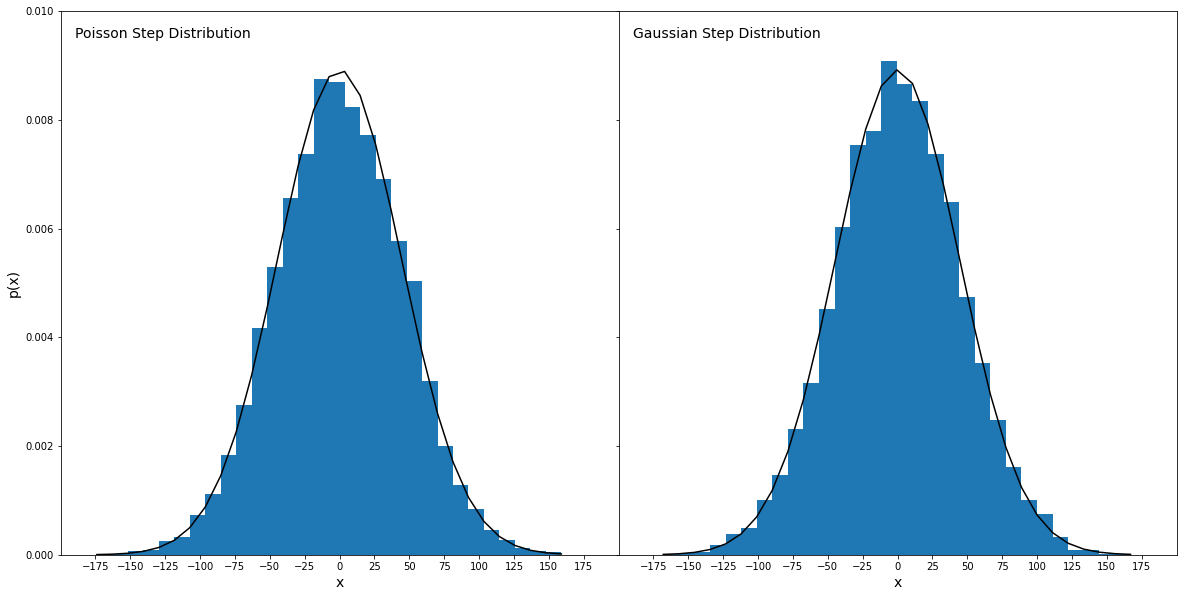

In [2]:
num_steps = 1000
num_particles = 10000

xvec_poisson = n_walk(num_particles, num_steps, 'poisson')
xvec_gaussian = n_walk(num_particles, num_steps, 'gaussian')

gaus_dist = stats.norm(0.0, numpy.sqrt(2*num_steps))

fig, axs = plt.subplots(1, 2, sharey=True, figsize=(20,10))

n, bins, patches = axs[0].hist(xvec_poisson,bins=30, density=True)
axs[0].set_ylim(0,0.01)
axs[0].set_xlim(-200,200)
axs[0].set_xticks(numpy.arange(-175,176,25))
axs[0].text(-190, 0.0095, "Poisson Step Distribution", fontsize=14)
axs[0].set_xlabel("x",fontsize=14)
axs[0].set_ylabel("p(x)", fontsize=14)
y = gaus_dist.pdf(bins)
axs[0].plot(bins, y, "k")

n, bins, patches = axs[1].hist(xvec_gaussian,bins=30, density=True)
axs[1].set_xlim(-200,200)
axs[1].set_xticks(numpy.arange(-175,176,25))
axs[1].text(-190, 0.0095, "Gaussian Step Distribution", fontsize=14)
axs[1].set_xlabel("x",fontsize=14)
y = gaus_dist.pdf(bins)
axs[1].plot(bins, y, "k")


plt.subplots_adjust(wspace=0, hspace=0)
plt.show()

The left plot uses a **Poisson Step Distribution** whereas the right plot uses a **Gaussian Step Distribution**. As you can see the two are almost identical. Furthermore, the black curve on both plots is a Gaussian distribution weighted by the square root of twice the number of steps. In both cases, the Gaussian curve fits the histogram so both step distributions follow the central limit theorem.